In [1518]:
# import sys
# sys.path.insert(0, '/content/drive/My Drive/Colab/EI_conf/DeepLearn')

In [1519]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1520]:
from keras.models import Sequential
from keras.layers import Dense
from keras import activations
from keras import initializers
import numpy as np
import pandas as pd
import keras
from keras import layers
from keras import ops
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
 # fix random seed for reproducibility
np.random.seed(seed)
import matplotlib.pyplot as plt

In [1521]:
# X = np.load('X_total_ceew.npy')
X = np.load('Xmeterav_total_ceew.npy')
# X = np.load('/content/drive/My Drive/Colab/EI_conf/DeepLearn/X_total_ceew.npy')

In [1522]:
X2 = X.reshape((X.shape[0], X.shape[1], 1))
X2.shape

(84, 24, 1)

In [1523]:
# Y = np.zeros ((len(X),1))
# Y.shape
# l = 0
# for i in range (n_clusters):
#     for j in range (len(X[labels == i])):
#         Y[j+l] = i
#     l = l + len(X[labels ==i])

In [1524]:
np.random.seed(seed)
seed = 8
org_dim = 24
latent_dim = 8
int_dim = 32

input_ts = keras.Input(shape=(org_dim,))
encoded = Dense(int_dim, activation='relu')(input_ts)
encoded = Dense(latent_dim , activation='relu')(encoded)

decoded = Dense(int_dim, activation='relu')(encoded)
decoded = Dense (org_dim, activation ='relu')(decoded)

autoencoder = keras.Model(input_ts, decoded)
encoder = keras.Model(input_ts, encoded)

encoded_input = keras.Input(shape=(latent_dim ,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1](decoder_layer1(encoded_input))
decoder = keras.Model(encoded_input, decoder_layer2)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary(
    line_length=None,
    positions=None,
    print_fn=None,
    expand_nested=False,
    show_trainable=False,
    layer_range=None,
)

Model: "functional_241"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_80 (InputLayer)     │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 24)             │           792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,144 (8.38 KB)

 Trainable params: 2,144 (8.38 KB)

 Non-trainable params: 0 (0.00 B)

In [1525]:
print (encoder.summary())

Model: "functional_243"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_80 (InputLayer)     │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,064 (4.16 KB)

 Trainable params: 1,064 (4.16 KB)

 Non-trainable params: 0 (0.00 B)

None


In [1526]:
print (decoder.summary())

Model: "functional_245"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_81 (InputLayer)     │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 24)             │           792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,080 (4.22 KB)

 Trainable params: 1,080 (4.22 KB)

 Non-trainable params: 0 (0.00 B)

None


In [1527]:
history = autoencoder.fit(X2, X2, epochs=50, batch_size=10)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0814
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0819 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0588 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0583 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0582 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0513 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0405 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0357 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0391 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0417 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0358 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0331 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0320 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0261 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0295 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━

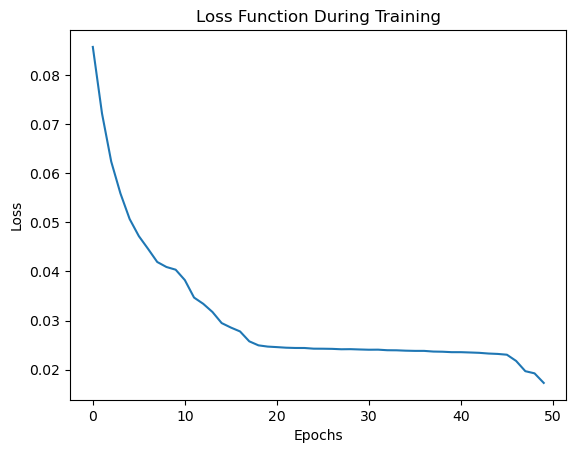

In [1528]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function During Training')
plt.show()

In [1529]:
Z = autoencoder.predict(X,batch_size=None, verbose="auto", steps=None, callbacks=None)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [1530]:
L = encoder.predict(X2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [1531]:
L.shape

(84, 8)

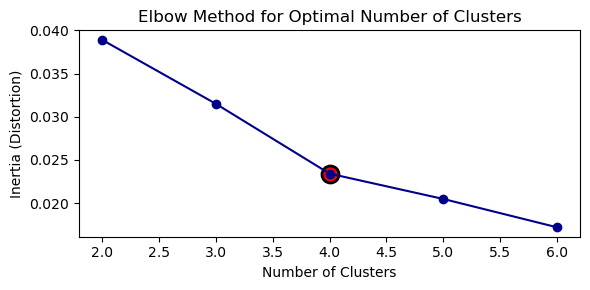

In [1532]:
fig, axs = plt.subplots(1, 1, figsize=(6,3))

# Plotting Inertia values
axs.plot(cluster_range, inertia_values, marker='o', color='darkblue')
axs.scatter(4, inertia_values[2], color='red', s=150, edgecolors='black', linewidths=2)  # Highlighting the point
axs.set_xlabel('Number of Clusters')
axs.set_ylabel('Inertia (Distortion)')
axs.set_title('Elbow Method for Optimal Number of Clusters')
axs.grid(False)

# # Plotting Loss Function During Training
# axs[1].plot(history.history['loss'], color='darkred')
# axs[1].set_xlabel('Epochs')
# axs[1].set_ylabel('Loss')
# axs[1].set_title('Loss Function During Training')
# axs[1].grid(False)

plt.tight_layout()
plt.savefig("elbow.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [1533]:
X_scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(L)
n_clusters =4
ks = KShape(n_clusters=n_clusters, verbose=True, random_state=0)
ks_cluster_assignments = ks.fit_predict(X_scaled)
ks.cluster_centers_.shape
labels = ks.labels_

0.016 --> 0.084 --> 


In [1534]:
X2a = X_scaled

In [1535]:
for i in range(n_clusters):
    num_points_in_cluster = len(X_scaled[ks_cluster_assignments == i])
    print(f"Cluster {i}: {num_points_in_cluster} data points")

Cluster 0: 20 data points
Cluster 1: 17 data points
Cluster 2: 37 data points
Cluster 3: 10 data points


In [1536]:
ks.cluster_centers_.shape

(4, 8, 1)

In [1537]:
cluster_assignments_scaled = ks_cluster_assignments

In [1538]:
ks_cluster_centers = ks.cluster_centers_
cluster_centers_scaled = ks_cluster_centers.reshape(n_clusters,latent_dim)
cluster_centers_scaled = decoder.predict(cluster_centers_scaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [1539]:
xc = ks_cluster_centers
xc1 = xc.reshape((xc.shape[0], xc.shape[1]))
df_c = pd.DataFrame(xc1)

In [1540]:
# plt.figure(figsize=(8,4))

# colors = ['khaki', 'lightgrey', '#90EE90', 'thistle']  # Different color combinations

# for i in range(n_clusters):
#     ax = plt.subplot(1, n_clusters, i+1)
#     cluster_label = f'Cluster-{i}'
#     ax.set_title(cluster_label, fontsize=14)
    
#     X2b = X2a.reshape((X2a.shape[0], X2a.shape[1]))

    
#     x1 = X2b[labels == i]
#     x2 = pd.DataFrame(x1).T
#     x3 = df_c.loc[i,:]
#     x4 = x2.mean(axis=1)
    
#     ax.set_xlabel('Hour of the day', fontsize=12)
#     if i == 0:
#         ax.set_ylabel('Load in kWh (normalized)', fontsize=14)  # Add ylabel only for the leftmost plot
# #     ax.set_ylim(0, 5)
    
#     plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
# #     plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
#     plt.grid(True, linestyle='--', alpha=0.5)
        
#     plt.legend(loc='upper right', fontsize=10)  # Add legend for cluster members and centroids

# plt.tight_layout()
# plt.savefig("latent_autokshape_cseg2.pdf", format='pdf', bbox_inches='tight')

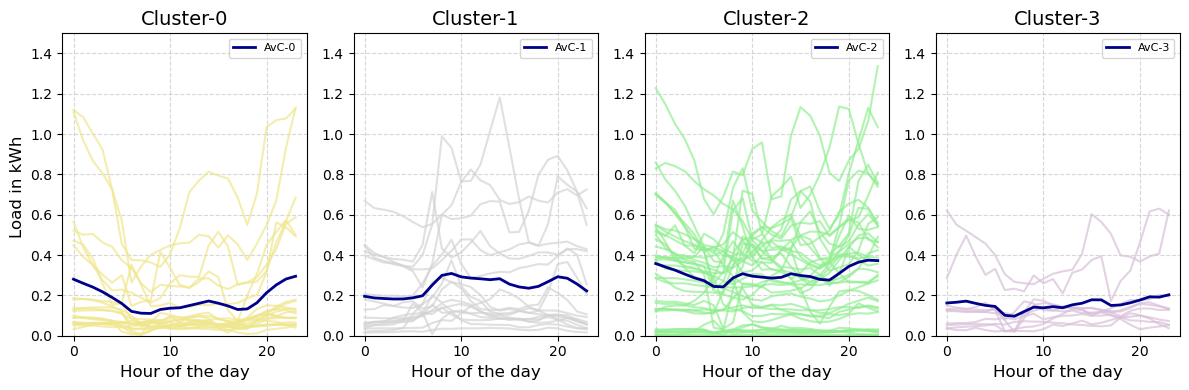

In [1541]:
plt.figure(figsize=(12, 4))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle', 'lightblue', 'lightsalmon','cyan','orange']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2b = X2.reshape((X2.shape[0], X2.shape[1]))

    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
#     x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh ', fontsize=12)  # Add ylabel only for the leftmost plot
    ax.set_ylim(0, 1.5)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()
plt.savefig("aekshape_cseg_singlescale.pdf", format='pdf', bbox_inches='tight')

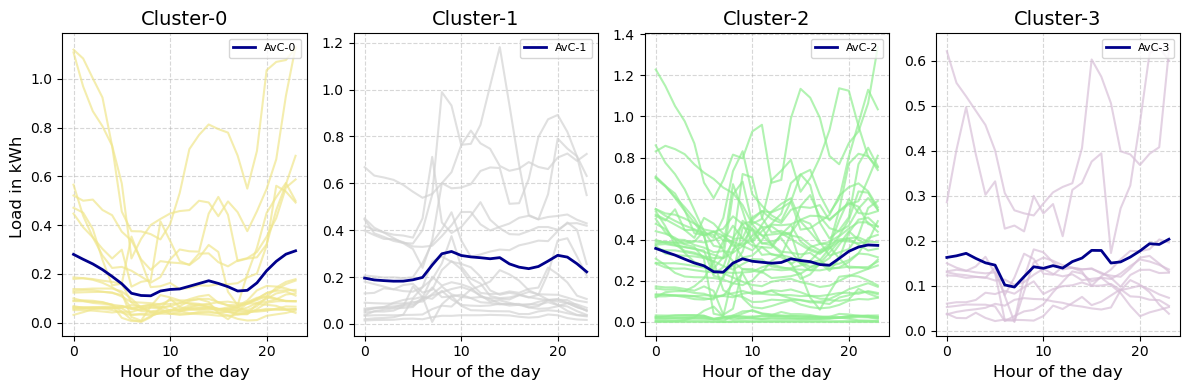

In [1542]:
plt.figure(figsize=(12, 4))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle', 'lightblue', 'lightsalmon','cyan','orange']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2b = X2.reshape((X2.shape[0], X2.shape[1]))

    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
#     x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh ', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 1.5)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()
plt.savefig("aekshape_cseg.pdf", format='pdf', bbox_inches='tight')

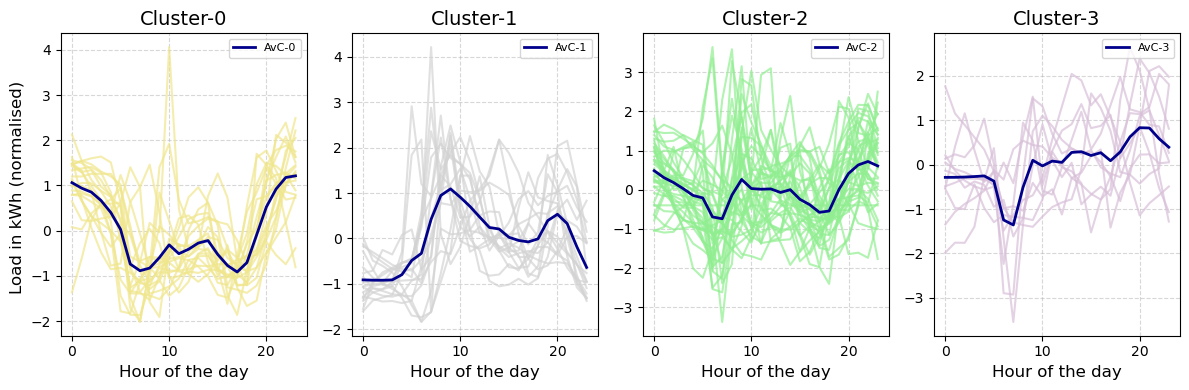

In [1543]:
plt.figure(figsize=(12, 4))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle', 'lightblue', 'lightsalmon','cyan','orange']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2 = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X2)
    X2b = X2.reshape((X2.shape[0], X2.shape[1]))

    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
#     x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh (normalised) ', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 4)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()
plt.savefig("norm_aekshape_cseg.pdf", format='pdf', bbox_inches='tight')

In [1544]:
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X[cluster_assignments_scaled == j], axis=1) 
#     peak_rlc = np.argmax(cluster_centers_scaled[j, :])
    peak_rlc = np.argmax(np.mean(X[cluster_assignments_scaled == j], axis=0))
    c[j,peak_rlc] = 1
    for i in range(len(X[cluster_assignments_scaled == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[cluster_assignments_scaled == j])
pms = pm/len(X)
print(pm, pms)
        

12.0 0.14285714285714285


In [1545]:
from sklearn.metrics import silhouette_score
silhouette_score(X, ks_cluster_assignments)

-0.1751463193910523

In [1546]:
from tslearn.metrics import cdist_dtw
from tslearn.metrics import dtw
silhouette_score(X, ks_cluster_assignments, metric = dtw)  

-0.18316630535668146

In [1547]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, ks_cluster_assignments)

2.450229889719459

In [1548]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, ks_cluster_assignments)

5.2212672213518045

In [1549]:
X[labels==1].shape

(17, 24)

In [1550]:
import aeon
from aeon.distances import sbd_distance
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    for i in range(len(X[labels == j])):
        k = k + sbd_distance(np.mean(X[labels == j],axis=0), X[labels == j][i,:])
        
print(k)

28.818396333269128


In [1551]:
#PMS with mean

y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X[labels == j], axis=1) 
#     peak_rlc = np.argmax(xc[j, :])
    peak_rlc = np.argmax(np.mean(X[labels == j], axis=0))
    c[j,peak_rlc] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[labels == j])
pms = pm/len(X)
print(pm, pms)

12.0 0.14285714285714285


In [1552]:
dmd_pk = np.load('dmd_pk.npy')
from sklearn.metrics.pairwise import euclidean_distances


0 [[19.66696599]] 19.666965987719134 0.42750065400100556
1 [[20.2954172]] 20.295417195850078 0.004005350334298496
2 [[7.5677723]] 7.56777229838652 0.37260624899381845
3 [[25.55611045]] 25.55611045214948 0.4195779497834583


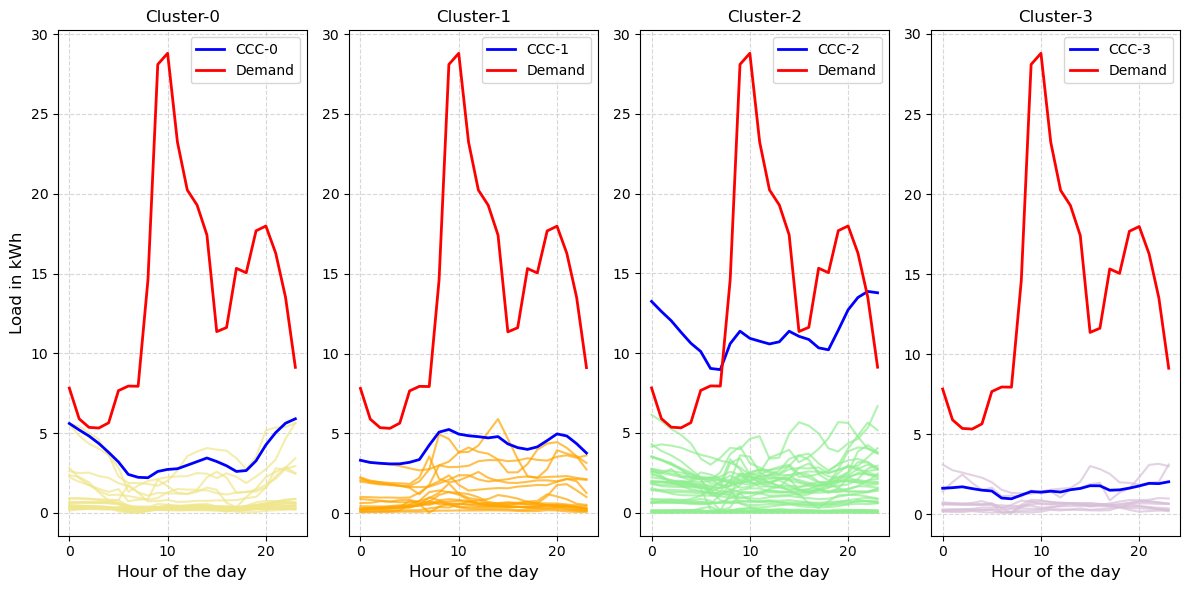

In [1553]:
import matplotlib.pyplot as plt
import pandas as pd


# Assuming cluster_assignments_scaled, cluster_centers_scaled, and X are defined

plt.figure(figsize=(12, 6))

colors = ['khaki', 'orange', '#90EE90', 'thistle']  # Different color combinations

for i in range(4):
    ax = plt.subplot(1, 4, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=12)
    
    x1 = X[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = x2.mean(axis=1)
    x4 = x2.sum(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    
    plt.plot(x2*5, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
    plt.plot(x4, linewidth=2, color='blue', alpha=1, label=f'CCC-{i}')  # Cluster centroids with label
#     plt.plot(x3*5, linewidth=2, color='darkblue', alpha=1, label=f'RLC-{i}')  # Cluster centroids with label
    plt.plot(dmd_pk,linewidth = 2, color='red', label ='Demand')
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=10)  # Add legend for cluster members and centroids
    x4_array = np.array(x4[20:24]).reshape(-1, 1).T
    dmd_pk_array = np.array(dmd_pk[20:24]).reshape(-1, 1).T
    distances = euclidean_distances(x4_array, dmd_pk_array)
    sbdist = sbd_distance(x4_array, dmd_pk_array)
    print(i, distances,dtw(dmd_pk[20:24],x4[20:24]),sbdist)
plt.tight_layout()

# Save as PDF
plt.savefig("cc_aekshape.pdf", format='pdf', bbox_inches='tight')

plt.show()